In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_pmana = pd.read_csv('Pmana_corail_1997-2021_annuel.csv')
data_all = pd.read_csv('../../coraux_tot_1987-2019_annuel.csv')
data_rec = pd.read_csv('recrutement_2000-2021_biannuel.csv')
data_norm = pd.read_csv('../../../coraux_tot_not_normalized.csv')

In [3]:
data_pmana.set_index('Year', inplace=True)
data_all.set_index('year', inplace=True)
data_rec.set_index('Date début', inplace=True)
data_norm.set_index('year', inplace=True)

In [4]:
data_pmana_count = data_norm['Fore reef']

In [5]:
data_pmana_tot = data_pmana['Total']
data_pmana.drop(columns='Total', inplace=True)

In [6]:
# multiply each row of data_pmana by the corresponding row of data_pmana_count
data_pmana_abs = data_pmana.mul(data_pmana_count, axis=0)

In [7]:
# drop NaN rows
data_pmana_abs.dropna(inplace=True)

# round values to integers
data_pmana_abs = data_pmana_abs.round(0).astype(int)

In [18]:
data_rec_tot = data_rec['Total']
data_rec.drop(columns='Total', inplace=True)

In [19]:
data_rec_abs = data_rec.mul(data_rec_tot, axis=0)

<Axes: xlabel='Date début'>

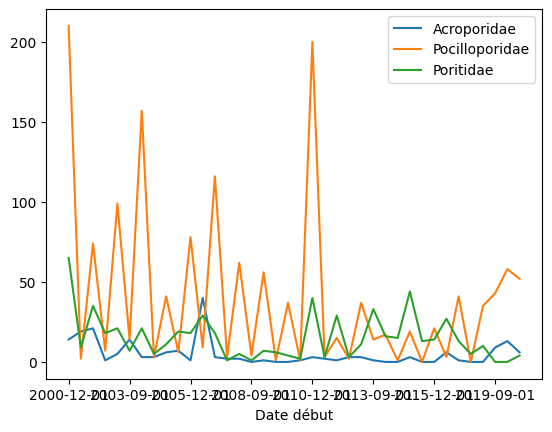

In [21]:
data_rec_abs[['Acroporidae', 'Pocilloporidae', 'Poritidae']].plot()

<Axes: >

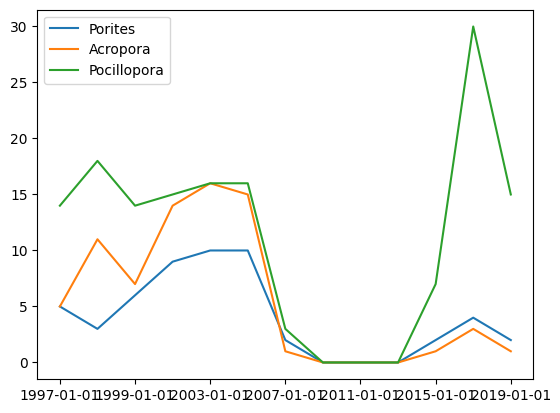

In [24]:
data_pmana_abs[['Porites', 'Acropora', 'Pocillopora']].plot()

In [26]:
# cros correlation
data_pmana_abs[['Porites', 'Acropora', 'Pocillopora']].corrwith(data_rec_abs[['Acroporidae', 'Pocilloporidae', 'Poritidae']], axis=0)

Acropora         NaN
Acroporidae      NaN
Pocillopora      NaN
Pocilloporidae   NaN
Porites          NaN
Poritidae        NaN
dtype: float64

In [9]:
data_pmana = data_pmana[['Porites', 'Acropora', 'Pocillopora']]

<Axes: xlabel='Year'>

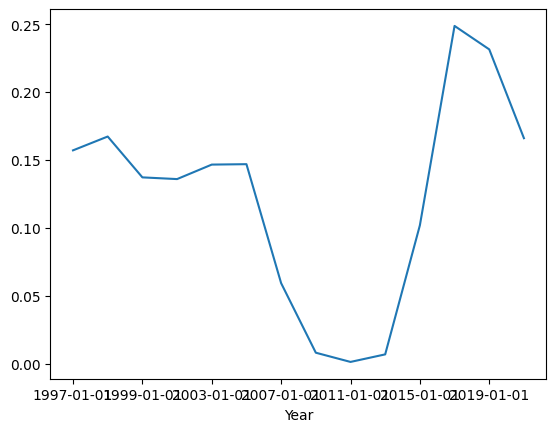

In [55]:
#plot only Pocillopora
data_poc = data_pmana['Pocillopora']
data_poc.plot()

<Axes: xlabel='Date début'>

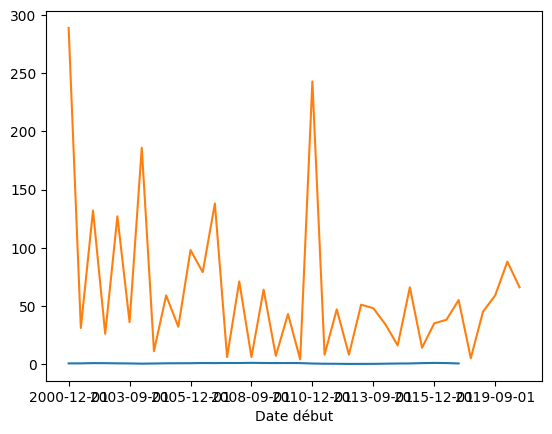

In [56]:
data_all['Fore reef'].plot()
data_rec['Total'].plot()

In [10]:
def Shannon_index(row):
    return -np.sum(elt * np.log2(elt + 0.0000000001) for elt in row)

In [58]:
def pielou(row):
    return Shannon_index(row)  / np.log2(np.count_nonzero(row))

In [59]:
def brillouin(row):
    return np.prod(list(np.math.factorial(elt) for elt in row)) / np.math.factorial(np.sum(row))  

In [60]:
def simpson(row):
    return 1 - np.sum(elt * (elt - 1) for elt in row) / (np.sum(row) * (np.sum(row) - 1))

In [61]:
data_pmana

,Acropora,Astrea curta,Astreopora,Autres corail,Cyphastrea,Fungia,Gardineroseris,Goniastrea stelligera,Herpolitha,Leptastrea,...,Lobophyllia,Millepora,Montipora,Napopora,Pavona,Pocillopora,Porites,Porites rus,Psammocora,Sandalolitha
Year,,,,,,,,,,,,,,,,,,,,,
1997-01-01,0.051389,0.002778,0.000617,0.010031,0.000000,0.001698,0.000000,0.003086,0.001440,0.008333,...,0.000000,0.000000,0.015278,0.006790,0.006944,0.157099,0.053241,0.003086,0.000000,0.0
1998-01-01,0.096296,0.004938,0.000000,0.017284,0.000000,0.006173,0.000000,0.004321,0.000000,0.002469,...,0.000000,0.000000,0.011111,0.003704,0.001852,0.167284,0.024691,0.000000,0.000000,0.0
1999-01-01,0.065741,0.002932,0.001235,0.010957,0.000000,0.005556,0.000000,0.002469,0.001029,0.010648,...,0.000617,0.005556,0.026235,0.004167,0.003549,0.137191,0.061265,0.001235,0.000000,0.0
2001-01-01,0.123213,0.004500,0.000634,0.006546,0.000000,0.006205,0.000617,0.001440,0.001405,0.012784,...,0.000617,0.012963,0.026559,0.009877,0.005604,0.135932,0.079524,0.003419,0.000617,0.0
2003-01-01,0.138580,0.000926,0.001235,0.009568,0.000000,0.008025,0.000000,0.000617,0.001235,0.011420,...,0.000000,0.000000,0.011111,0.007716,0.004630,0.146605,0.092593,0.004012,0.000000,0.0
2005-01-01,0.137963,0.002160,0.000617,0.009259,0.000000,0.008642,0.000000,0.001852,0.002160,0.013272,...,0.000000,0.000000,0.009259,0.009568,0.005247,0.146914,0.090432,0.003395,0.000000,0.0
2007-01-01,0.020988,0.001852,0.000000,0.000000,0.000000,0.003704,0.000000,0.000000,0.003704,0.000617,...,0.000000,0.000000,0.003704,0.002469,0.000000,0.059259,0.030247,0.004938,0.000000,0.0
2009-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.002460,0.000000,0.000000,0.000000,0.008020,0.000000,0.000000,0.000000,0.0
2011-01-01,0.000000,0.000000,0.000000,0.001235,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000617,0.000000,0.001235,0.003086,0.000617,0.000000,0.0


In [62]:
data_rec_tot = data_rec['Total']
data_rec.drop(columns='Total', inplace=True)

In [63]:
data_abs = data_rec.mul(data_rec_tot, axis=0).round(0).astype(int)

In [64]:
shannon_rec = data_rec.apply(Shannon_index, axis=1)
pielou_rec = data_rec.apply(pielou, axis=1)

C:\Users\alexi\AppData\Local\Temp\ipykernel_588944\236946479.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return -np.sum(elt * np.log2(elt + 0.0000000001) for elt in row)
C:\Users\alexi\AppData\Local\Temp\ipykernel_588944\3092356476.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  return Shannon_index(row)  / np.log2(np.count_nonzero(row))


<Axes: xlabel='Date début'>

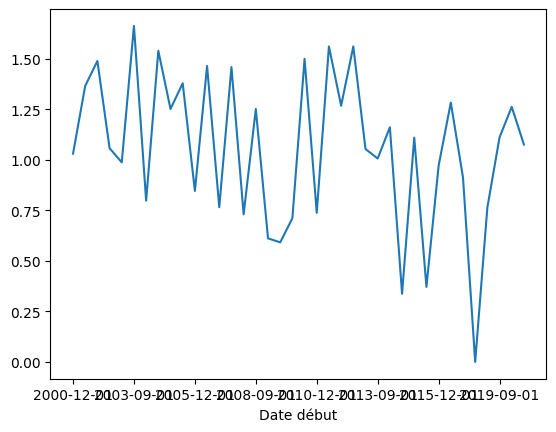

In [65]:
shannon_rec.plot()

In [66]:
brillouin_rec = data_abs.apply(brillouin, axis=1)
simpson_rec = data_abs.apply(simpson, axis=1)

C:\Users\alexi\AppData\Local\Temp\ipykernel_588944\2682157653.py:2: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return np.prod(list(np.math.factorial(elt) for elt in row)) / np.math.factorial(np.sum(row))
C:\Users\alexi\AppData\Local\Temp\ipykernel_588944\1921702351.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return 1 - np.sum(elt * (elt - 1) for elt in row) / (np.sum(row) * (np.sum(row) - 1))


<Axes: xlabel='Date début'>

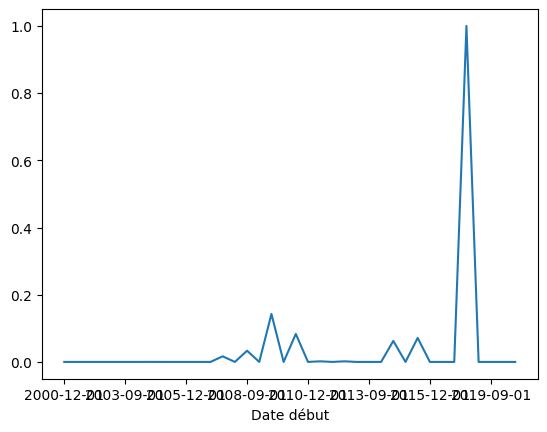

In [67]:
brillouin_rec.plot()

<Axes: xlabel='Date début'>

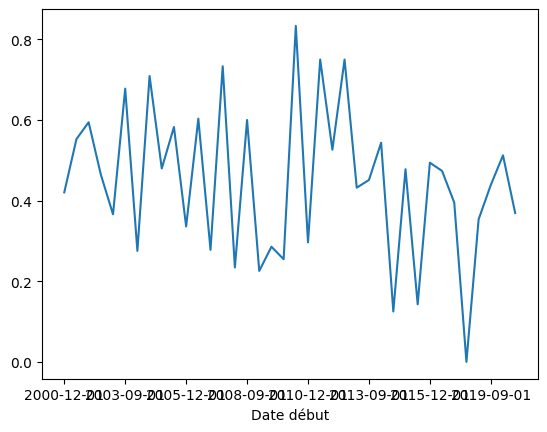

In [68]:
simpson_rec.plot()

In [12]:
# for shannon and pielou indexes, we need to normalize the data
data_pmana = data_pmana.div(data_pmana_tot, axis=0)

In [14]:
shannon_fore = data_pmana.apply(Shannon_index, axis=1)

C:\Users\alexi\AppData\Local\Temp\ipykernel_105592\236946479.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return -np.sum(elt * np.log2(elt + 0.0000000001) for elt in row)


In [13]:
shannon_fore = data_pmana.apply(Shannon_index, axis=1)
pielou_fore = data_pmana.apply(pielou, axis=1)
brillouin_fore = data_pmana_abs.apply(brillouin, axis=1)
simpson_fore = data_pmana_abs.apply(simpson, axis=1)

C:\Users\alexi\AppData\Local\Temp\ipykernel_105592\236946479.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return -np.sum(elt * np.log2(elt + 0.0000000001) for elt in row)


NameError: name 'pielou' is not defined

<Axes: xlabel='Year'>

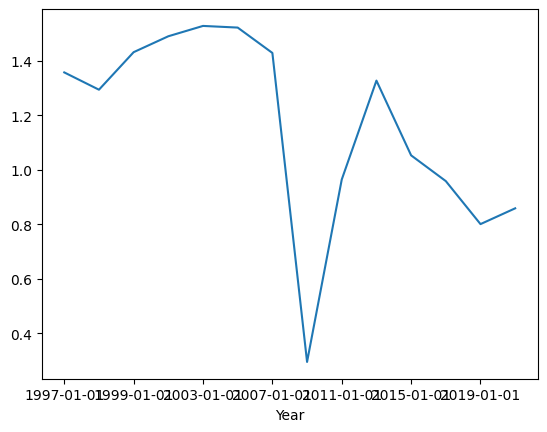

In [15]:
shannon_fore.plot()

<Axes: xlabel='Year'>

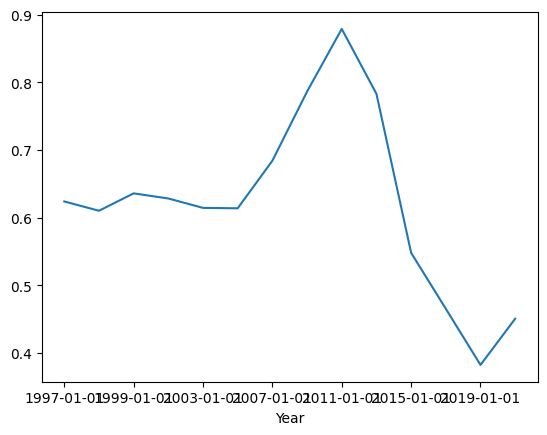

In [72]:
pielou_fore.plot()

<Axes: >

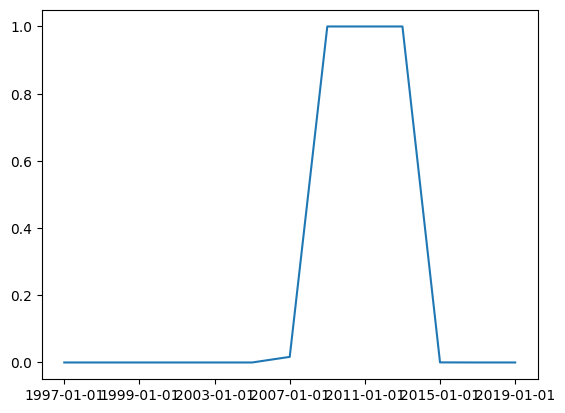

In [73]:
brillouin_fore.plot()

In [74]:
simpson_fore

1997-01-01    0.726601
1998-01-01    0.681682
1999-01-01    0.768271
2001-01-01    0.791667
2003-01-01    0.747340
2005-01-01    0.750231
2007-01-01    0.733333
2009-01-01         NaN
2011-01-01         NaN
2013-01-01         NaN
2015-01-01    0.600000
2017-01-01    0.477352
2019-01-01    0.380117
dtype: float64

<Axes: >

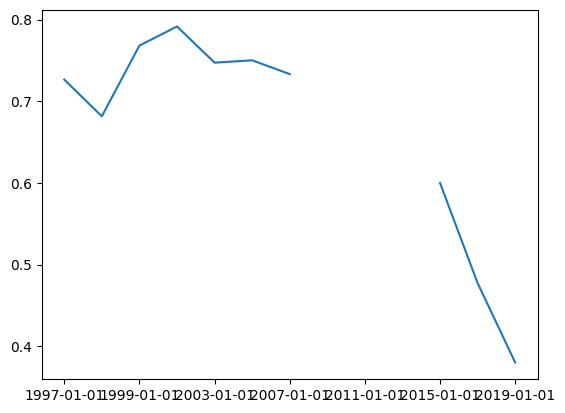

In [75]:
simpson_fore.plot()

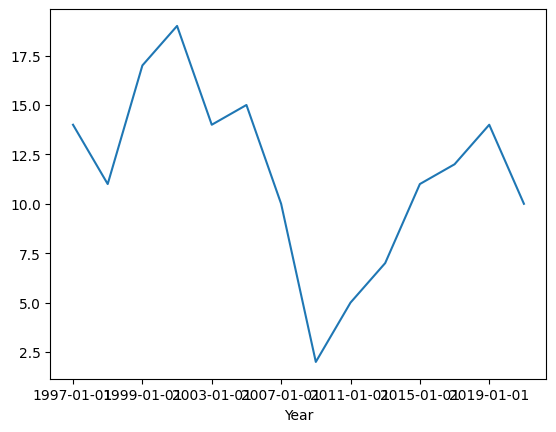

In [76]:
# count non-zero values for each row
data_pmana_bool = data_pmana.astype(bool).sum(axis=1)
data_pmana_bool.plot()
data_pmana['Species richness'] = data_pmana_bool / data_pmana_bool.max()

In [77]:
# add Shannon index to data_pmana
data_pmana['Shannon'] = shannon_fore / shannon_fore.max()

# add total to data_pmana
data_pmana['Total'] = data_pmana_tot

In [78]:
data_pmana['Pielou'] = pielou_fore
# data_rec['Pielou'] = pielou_rec
data_rec['Total'] = data_rec_tot

In [79]:
data_pmana['Brillouin'] = brillouin_fore
data_pmana['Simpson'] = simpson_fore

In [80]:
data_pmana.to_csv('Pmana_corail_indexes.csv')

In [81]:
data_rec['Total'] = data_rec_tot / data_rec_tot.max()
data_rec['Shannon'] = shannon_rec / shannon_rec.max()
data_rec['Pielou'] = pielou_rec
data_rec['Brillouin'] = brillouin_rec
data_rec['Simpson'] = simpson_rec


In [82]:
data_rec.to_csv('recrutement.csv')

<Axes: xlabel='Date début'>

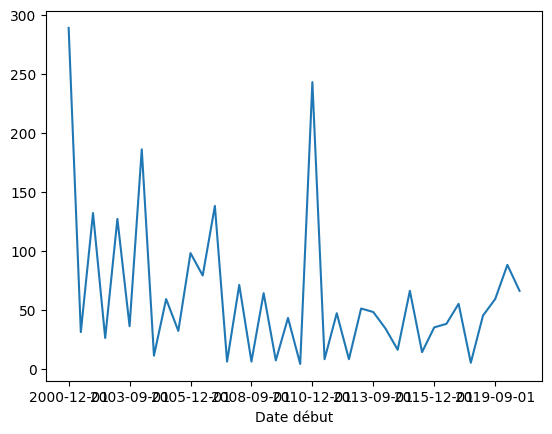

In [83]:
data_rec_tot.plot()

<Axes: xlabel='year'>

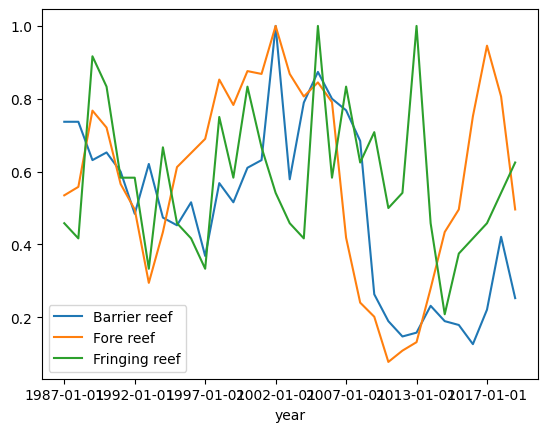

In [84]:
data_all.plot()

In [85]:
# define a cross correlation function
def crosscorr(datax, datay, lag=0):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    
    Returns
    ----------
    crosscorr : float
    """
    return datax.corr(datay.shift(lag))

In [86]:
data_pmana.index = pd.to_datetime(data_pmana.index)

In [87]:
# compute the mean time intervall for a lag
lag_val = int((data_pmana.index.max() - data_pmana.index.min()).days) / len(data_pmana) / 365
4*lag_val

6.861839530332681

C:\Users\alexi\AppData\Roaming\Python\Python310\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\alexi\AppData\Roaming\Python\Python310\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\alexi\AppData\Roaming\Python\Python310\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


(-1.0, 1.0)

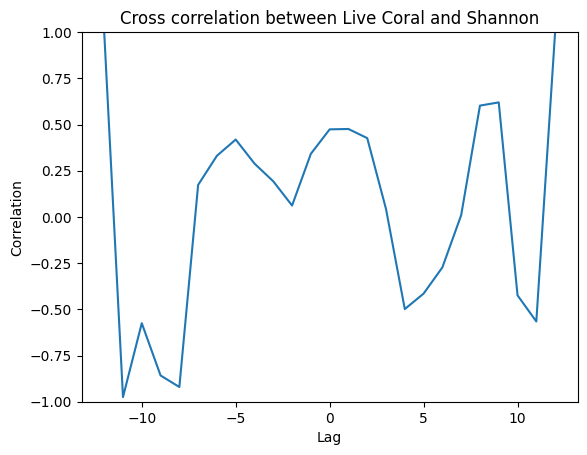

In [88]:
# cross correlation between DC and LC
max_lag = 50
lags = range(-max_lag,max_lag+1)
rs = [crosscorr(data_pmana['Total'], data_pmana['Shannon'], lag) for lag in lags]
plt.figure()
plt.title(f'Cross correlation between Live Coral and Shannon')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.plot(lags, rs)
plt.ylim(-1,1)


(-1.0, 1.0)

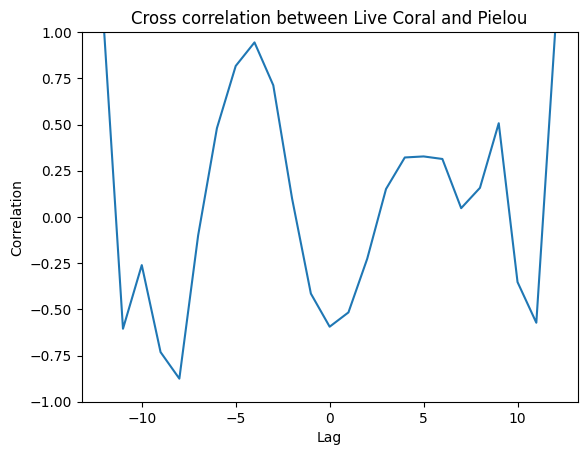

In [89]:
# cross correlation between DC and LC
max_lag = 50
lags = range(-max_lag,max_lag+1)
rs = [crosscorr(data_pmana['Total'], data_pmana['Pielou'], lag) for lag in lags]
plt.figure()
plt.title(f'Cross correlation between Live Coral and Pielou')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.plot(lags, rs)
plt.ylim(-1,1)


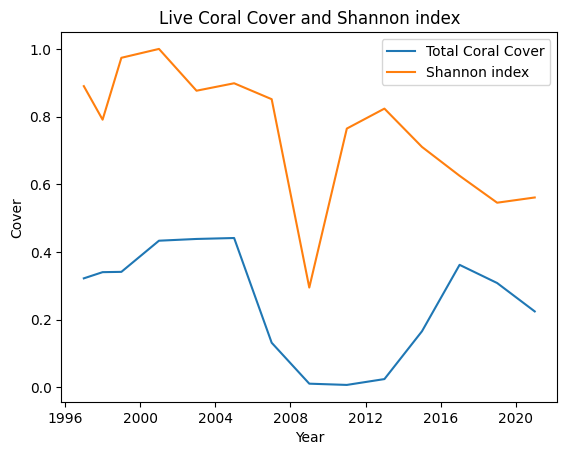

In [90]:
# plot total coral cover and Shannon index with a lag of -5
plt.figure()
plt.title(f'Live Coral Cover and Shannon index')
plt.xlabel('Year')
plt.ylabel('Cover')
plt.plot(data_pmana.index, data_pmana['Total'], label='Total Coral Cover')
plt.plot(data_pmana.index, data_pmana['Shannon'].shift(0), label='Shannon index')
plt.legend()

<Axes: xlabel='Year'>

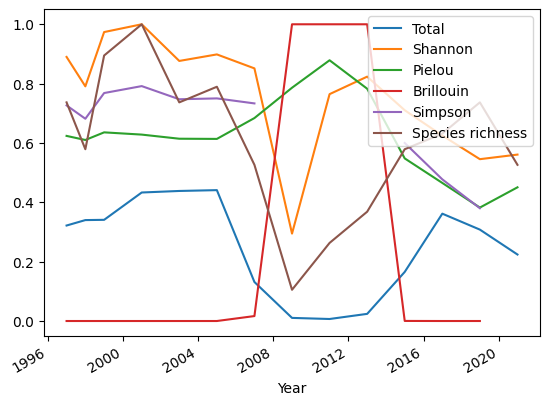

In [91]:
data_pmana.plot(y=['Total', 'Shannon', 'Pielou', 'Brillouin', 'Simpson', 'Species richness'])